#Knn classifier using default euclidean distance method.
#Description of the variables as given in Readme.md file

In [4]:
#Reading file
url="https://raw.githubusercontent.com/rajsiddarth119/Datasets/master/Bank_dataset.csv"
import pandas as pd
data=pd.read_csv(url,header=0,names=["id","age","experience","income","zipcode","family"
             ,"ccavg","education","mortgage","pers_loan","sec_amount","cd_account","online","credit_card"])
#Removing id,zipcode and experience
data.drop(['id','experience','zipcode'],inplace=True,axis=1)
categ_data=data.loc[:,['family','education','sec_amount','cd_account','online','credit_card']]
dep_data=data['pers_loan']
data.drop(['family','education','pers_loan','sec_amount','cd_account','online','credit_card'],inplace=True,axis=1)

#Converting to categorical variables
for i in categ_data.columns:
    categ_data= pd.get_dummies(categ_data,prefix= str(i)+'_',columns=[i])
    
#Using mean normalizationfor numerical variables
from sklearn import preprocessing
min_max_scaler=preprocessing.MinMaxScaler()
data=pd.DataFrame(min_max_scaler.fit_transform(data.values),columns=['age','income','ccavg','mortgage'])
data=pd.concat([data,categ_data,dep_data],axis=1)

#Converting target variable to category 
data['pers_loan']=data['pers_loan'].astype('category')


In [5]:
#Dividing into train and test using cross validation
#Taking out evaluation set using stratified sampling
import random
random.seed(123)
from sklearn.cross_validation import StratifiedShuffleSplit,StratifiedKFold
X,Y=data.ix[:,:-1],data.ix[:,-1]
data_index=StratifiedShuffleSplit(Y,n_iter=1,test_size=0.3)
for train_index,test_index in data_index:
    X_data,X_evaldata=X.loc[train_index],X.loc[test_index]
    Y_data,Y_evaldata=Y.loc[train_index],Y.loc[test_index]
data=pd.concat([X_data,Y_data],axis=1).reset_index()
eval_data=pd.concat([X_evaldata,Y_evaldata],axis=1).reset_index()
#Checking the sampling for data and eval data
print(data['pers_loan'].value_counts())
print(eval_data['pers_loan'].value_counts())
import warnings
warnings.filterwarnings("ignore")

0    3164
1     336
Name: pers_loan, dtype: int64
0    1356
1     144
Name: pers_loan, dtype: int64


In [6]:
#Knn without parameter tuning

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors=3)

# fitting the model
knn.fit(X_data, Y_data)

# predict the response
pred = knn.predict(X_evaldata)

# evaluate accuracy
print (accuracy_score(Y_evaldata,pred))

#Predicting loan defaulters as 

0.951333333333


In [7]:
#Parameter tuning for Knn using 10-fold cross validation
from sklearn.model_selection import cross_val_score

# creating odd list of K for KNN
myList = list(range(1,50))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_data, Y_data, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

#Misclassification error
MSE=[1-x for x in cv_scores]
optimal_k=neighbors[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 1


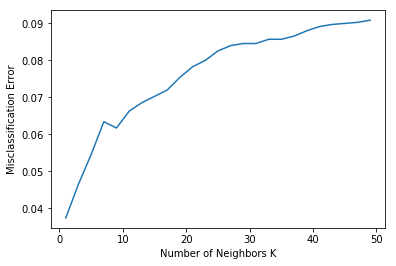

In [8]:
# plot misclassification error vs k
import matplotlib.pyplot as plt
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()   

In [9]:
#Making predictions using K=1;optimal k on eval data
import numpy as np
def  kNearestNeighbor(X_train,Y_train,x_test,k):
    # instantiate learning model 
    knn = KNeighborsClassifier(n_neighbors=k)

    # fitting the model
    knn.fit(X_train,Y_train)

    # predict the response
    pred = knn.predict(x_test)
    
    return np.asarray(pred)

predictions=kNearestNeighbor(X_data, Y_data, X_evaldata,1)

print ('The accuracy of the knn model is %f' %accuracy_score(Y_evaldata,predictions))

The accuracy of the knn model is 0.957333
